In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import yfinance as yf
import finpy_tse as tse
import time

In [217]:
def equal_log(data1, data2):
    l = []
    if len(data1) > len(data2):
        for i in data1:
            for j in data2:
                if i == j:
                    l.append(True)
                    break
            else:
                l.append(False)
    else:
        for i in data2:
            for j in data1:
                if i == j:
                    l.append(True)
                    break
            else:
                l.append(False)
    return np.array(l)

In [218]:
def intersect(data1, data2):
    l = []
    if len(data1) > len(data2):
        for i in data1:
            for j in data2:
                if i == j:
                    l.append(i)
                    break
    else:
        for i in data2:
            for j in data1:
                if i == j:
                    l.append(i)
                    break
    #l = list(set(l))
    return np.array(l)

In [219]:
def mean_exp(data_in):
    p = 1
    n = 0
    for i in data_in:
        if i > 0:
            p *= i
            n += 1
    return p ** (1 / n)

In [220]:
tehran_stock = tse.Get_CWI_History(ignore_date=True, double_date=True)
tehran_stock.index = tehran_stock.Date
tehran_stock.drop('Date', axis=1, inplace=True)

In [236]:
gold_irr = tse.Get_Price_History(stock='طلا', ignore_date=True, double_date=True)
gold_irr.index = gold_irr.Date
gold_irr.drop(['Date','Ticker','No','Value','Final','Name','Market'], axis=1, inplace=True)

In [237]:
usd_irr = tse.Get_USD_RIAL(ignore_date=True, double_date=True)
usd_irr.index = usd_irr.Date
usd_irr.drop('Date', axis=1, inplace=True)

In [238]:
bitcoin = yf.download('BTC-USD', period='max', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [239]:
gold_usd = yf.download('GC=F', period='max', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [240]:
index = [tehran_stock, gold_irr, usd_irr, bitcoin, gold_usd]

In [241]:
index[0]

,Open,High,Low,Close,Adj Close
Date,,,,,
2008-12-06,9249.0,9249.0,9168.0,9178.0,9178.3
2008-12-07,9178.0,9178.0,9130.0,9130.0,9130.5
2008-12-08,9103.0,9103.0,9080.0,9089.0,9089.2
2008-12-10,9072.0,9072.0,9024.0,9024.0,9023.7
2008-12-13,8973.0,8973.0,8973.0,8973.0,8973.3
...,...,...,...,...,...
2023-02-13,1546530.0,1551840.0,1546530.0,1548278.0,1548278.2
2023-02-14,1548130.0,1548150.0,1537960.0,1537962.0,1537961.7
2023-02-15,1537670.0,1537670.0,1524790.0,1524795.0,1524795.0


In [242]:
index[1]

,Open,High,Low,Close,Volume
Date,,,,,
2017-06-10,10000,10000,10000,10000,7842985
2017-06-11,10000,10000,10000,10000,384820
2017-06-12,10000,10000,10000,10000,4095892
2017-06-13,10000,10000,10000,10000,280021
2017-06-14,10000,10000,10000,10000,3196327
...,...,...,...,...,...
2023-02-13,173210,175600,172010,175260,4836597
2023-02-14,178000,181749,176500,177400,9710077
2023-02-15,184000,186550,182010,186430,12430097


In [243]:
index[2]

,Open,High,Low,Close
Date,,,,
2011-11-27,13700,13700,13700,13700
2011-11-28,13440,13440,13440,13440
2011-11-29,13350,13350,13350,13350
2011-11-30,13400,13400,13400,13400
2011-12-01,13500,13500,13500,13500
...,...,...,...,...
2023-02-13,434370,434400,434100,434130
2023-02-14,434010,434390,434000,434110
2023-02-15,434290,450540,434090,450180


In [244]:
index[3]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-02-12,21870.902344,22060.994141,21682.828125,21788.203125,21788.203125,17821046406
2023-02-13,21787.000000,21898.414062,21460.087891,21808.101562,21808.101562,23918742607
2023-02-14,21801.822266,22293.140625,21632.394531,22220.804688,22220.804688,26792596581


In [245]:
index[4]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...,...
2023-02-14,1854.099976,1862.000000,1846.199951,1854.000000,1854.000000,656
2023-02-15,1842.000000,1842.000000,1828.199951,1834.199951,1834.199951,368
2023-02-16,1838.599976,1843.699951,1827.199951,1842.000000,1842.000000,222


In [246]:
ind_intersect = intersect(usd_irr.index, intersect(tehran_stock.index, gold_irr.index))
ind_intersect

array([Timestamp('2017-06-10 00:00:00'), Timestamp('2017-06-11 00:00:00'),
       Timestamp('2017-06-12 00:00:00'), ...,
       Timestamp('2023-02-14 00:00:00'), Timestamp('2023-02-15 00:00:00'),
       Timestamp('2023-02-19 00:00:00')], dtype=object)

In [247]:
col_intersect = intersect(usd_irr.columns, intersect(tehran_stock.columns, gold_irr.columns))
col_intersect

array(['Open', 'High', 'Low', 'Close'], dtype='<U5')

In [248]:
int_stock = tehran_stock.loc[ind_intersect, col_intersect]
int_gold = gold_irr.loc[ind_intersect, col_intersect]
int_usd = usd_irr.loc[ind_intersect, col_intersect]

In [249]:
int_stock

,Open,High,Low,Close
Date,,,,
2017-06-10,79811.0,79898.0,79811.0,79856.0
2017-06-11,79865.0,79884.0,79845.0,79871.0
2017-06-12,79873.0,79873.0,79564.0,79564.0
2017-06-13,79569.0,79576.0,79427.0,79427.0
2017-06-14,79440.0,79474.0,79432.0,79466.0
...,...,...,...,...
2023-02-12,1557860.0,1557860.0,1545970.0,1545978.0
2023-02-13,1546530.0,1551840.0,1546530.0,1548278.0
2023-02-14,1548130.0,1548150.0,1537960.0,1537962.0


In [250]:
int_gold

,Open,High,Low,Close
Date,,,,
2017-06-10,10000,10000,10000,10000
2017-06-11,10000,10000,10000,10000
2017-06-12,10000,10000,10000,10000
2017-06-13,10000,10000,10000,10000
2017-06-14,10000,10000,10000,10000
...,...,...,...,...
2023-02-12,167000,174500,164610,172850
2023-02-13,173210,175600,172010,175260
2023-02-14,178000,181749,176500,177400


In [251]:
int_usd

,Open,High,Low,Close
Date,,,,
2017-06-10,37380,37380,37350,37360
2017-06-11,37350,37380,37350,37350
2017-06-12,37340,37350,37290,37300
2017-06-13,37310,37310,37270,37270
2017-06-14,37280,37310,37270,37300
...,...,...,...,...
2023-02-12,434100,434460,433700,433820
2023-02-13,434370,434400,434100,434130
2023-02-14,434010,434390,434000,434110


In [252]:
int_usd[int_usd.duplicated() == False]

,Open,High,Low,Close
Date,,,,
2017-06-10,37380,37380,37350,37360
2017-06-11,37350,37380,37350,37350
2017-06-12,37340,37350,37290,37300
2017-06-13,37310,37310,37270,37270
2017-06-14,37280,37310,37270,37300
...,...,...,...,...
2023-02-12,434100,434460,433700,433820
2023-02-13,434370,434400,434100,434130
2023-02-14,434010,434390,434000,434110


In [253]:
all_ind = int_stock + int_usd * (int_stock.Close[0] / int_usd.Close[0]) + int_gold * (
        int_stock.Close[0] / int_gold.Close[0])
all_ind.drop_duplicates(inplace=True)
all_ind

,Open,High,Low,Close
Date,,,,
2017-06-10,2.395657e+05,2.396527e+05,2.395016e+05,2.395680e+05
2017-06-11,2.395556e+05,2.396387e+05,2.395356e+05,2.395616e+05
2017-06-12,2.395423e+05,2.395636e+05,2.391264e+05,2.391478e+05
2017-06-13,2.391741e+05,2.391811e+05,2.389466e+05,2.389466e+05
2017-06-14,2.389810e+05,2.390791e+05,2.389516e+05,2.390498e+05
...,...,...,...,...
2023-02-12,3.819332e+06,3.879994e+06,3.787502e+06,3.853568e+06
2023-02-13,3.858170e+06,3.882630e+06,3.848010e+06,3.875776e+06
2023-02-14,3.897252e+06,3.928022e+06,3.875082e+06,3.882506e+06


In [254]:
(int_stock.Close / all_ind.Close).drop_duplicates()

Date
2017-06-10    0.333333
2017-06-11    0.333405
2017-06-12    0.332698
2017-06-13    0.332405
2017-06-14    0.332425
                ...   
2023-02-12    0.401181
2023-02-13    0.399476
2023-02-14    0.396126
2023-02-15    0.383519
2023-02-19    0.374598
Name: Close, Length: 1209, dtype: float64

Text(0.5, 1.0, 'Tehran_stock_ratio_on_gold_and_currency')

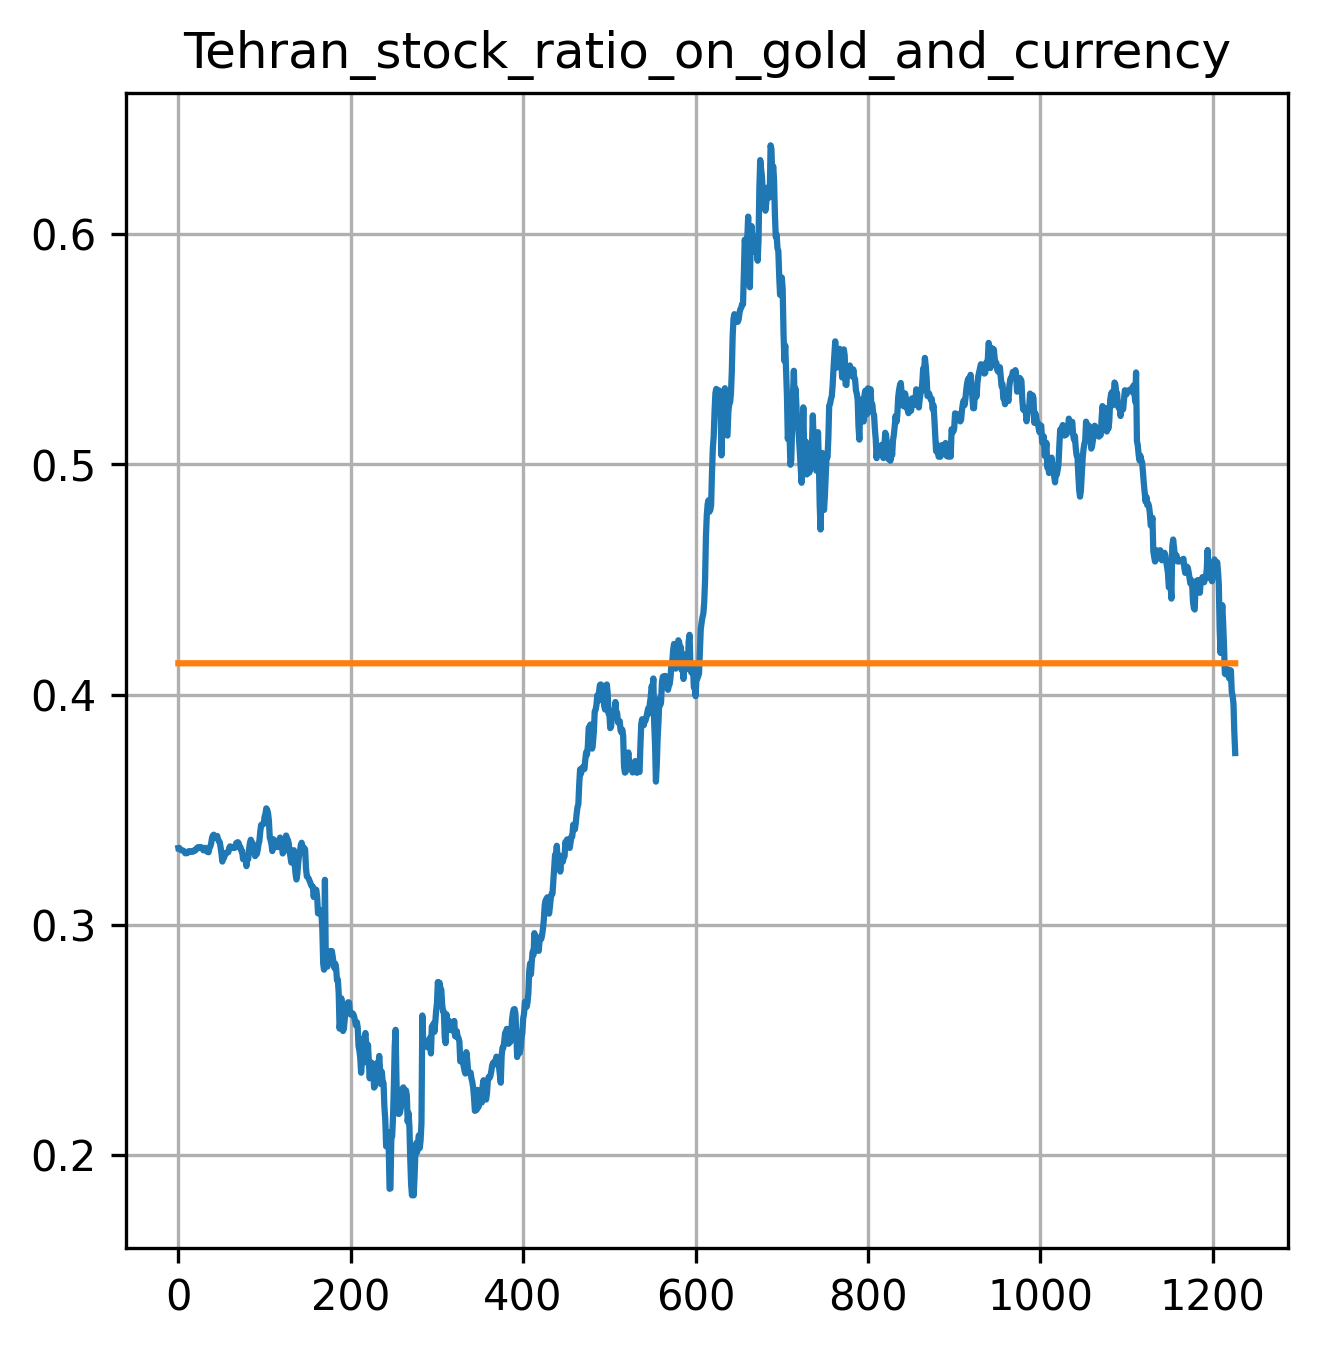

In [255]:
plt.figure(figsize=(5, 5), dpi=300)
plt.plot((int_stock.Close / all_ind.Close).values)
plt.plot([np.mean((int_stock.Close / all_ind.Close).values)] * len((int_stock.Close / all_ind.Close).values))
plt.grid()
plt.title('Tehran_stock_ratio_on_gold_and_currency')

In [256]:
str(tehran_stock.index[0])

'2008-12-06 00:00:00'

In [257]:
for i in tehran_stock.columns:
    tehran_stock.drop(tehran_stock[i][tehran_stock[i]==0].index,axis=0,inplace=True)

In [258]:
#mean_exp(tehran_stock_index.Close)

In [259]:
tehran_stock['Close'][-1]

1594263.0

In [260]:
mapper={i:f'{i}_return_1d' for i in tehran_stock.columns}
data_exp1={f'{mapper[i]}':[1] for i in mapper.keys()}

In [261]:
mapper

{'Open': 'Open_return_1d',
 'High': 'High_return_1d',
 'Low': 'Low_return_1d',
 'Close': 'Close_return_1d',
 'Adj Close': 'Adj Close_return_1d'}

In [262]:
tehran_stock

,Open,High,Low,Close,Adj Close
Date,,,,,
2008-12-06,9249.0,9249.0,9168.0,9178.0,9178.3
2008-12-07,9178.0,9178.0,9130.0,9130.0,9130.5
2008-12-08,9103.0,9103.0,9080.0,9089.0,9089.2
2008-12-10,9072.0,9072.0,9024.0,9024.0,9023.7
2008-12-13,8973.0,8973.0,8973.0,8973.0,8973.3
...,...,...,...,...,...
2023-02-13,1546530.0,1551840.0,1546530.0,1548278.0,1548278.2
2023-02-14,1548130.0,1548150.0,1537960.0,1537962.0,1537961.7
2023-02-15,1537670.0,1537670.0,1524790.0,1524795.0,1524795.0


In [263]:
tehran_stock['Open'][1]/tehran_stock['Open'][0]

0.9923234944318304

In [264]:
for i in tehran_stock.columns:
    for j in range(1,len(tehran_stock.index)):
        data_exp1[mapper[i]].append(tehran_stock[i][j]/tehran_stock[i][j-1])

In [265]:
pd.DataFrame(data_exp1)

,Open_return_1d,High_return_1d,Low_return_1d,Close_return_1d,Adj Close_return_1d
0,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992323,0.992323,0.995855,0.994770,0.994792
2,0.991828,0.991828,0.994524,0.995509,0.995477
3,0.996595,0.996595,0.993833,0.992848,0.992794
4,0.989087,0.989087,0.994348,0.994348,0.994415
...,...,...,...,...,...
3415,0.992727,0.996136,1.000362,1.001488,1.001488
3416,1.001035,0.997622,0.994459,0.993337,0.993337
3417,0.993243,0.993231,0.991437,0.991439,0.991439
3418,0.992020,0.997223,1.000400,1.005622,1.005621


In [266]:
mean_col = {}
for i in tehran_stock.columns:
    mean_col[f'{i}'] = mean_exp(data_exp1[f'{i}_return_1d'])
mean_col

{'Open': 1.001498351397261,
 'High': 1.0015068796776454,
 'Low': 1.0015009272653441,
 'Close': 1.0015091368785463,
 'Adj Close': 1.0015091272883494}

In [267]:
expected_data1 = {}
for i in tehran_stock.columns:
    expected_data1[f'exp_{i}'] = []
    for j in range(len(tehran_stock.index)):
        expected_data1[f'exp_{i}'].append(tehran_stock[i][0] * mean_col[i] ** j)
pd.DataFrame(expected_data1)

,exp_Open,exp_High,exp_Low,exp_Close,exp_Adj Close
0,9.249000e+03,9.249000e+03,9.168000e+03,9.178000e+03,9.178300e+03
1,9.262858e+03,9.262937e+03,9.181761e+03,9.191851e+03,9.192151e+03
2,9.276737e+03,9.276895e+03,9.195542e+03,9.205723e+03,9.206023e+03
3,9.290637e+03,9.290874e+03,9.209343e+03,9.219615e+03,9.219916e+03
4,9.304558e+03,9.304875e+03,9.223166e+03,9.233529e+03,9.233830e+03
...,...,...,...,...,...
3415,1.536951e+06,1.582302e+06,1.536931e+06,1.582287e+06,1.582287e+06
3416,1.539254e+06,1.584687e+06,1.539238e+06,1.584675e+06,1.584675e+06
3417,1.541560e+06,1.587075e+06,1.541548e+06,1.587067e+06,1.587067e+06
3418,1.543870e+06,1.589466e+06,1.543862e+06,1.589462e+06,1.589462e+06


In [268]:
tehran_stock

,Open,High,Low,Close,Adj Close
Date,,,,,
2008-12-06,9249.0,9249.0,9168.0,9178.0,9178.3
2008-12-07,9178.0,9178.0,9130.0,9130.0,9130.5
2008-12-08,9103.0,9103.0,9080.0,9089.0,9089.2
2008-12-10,9072.0,9072.0,9024.0,9024.0,9023.7
2008-12-13,8973.0,8973.0,8973.0,8973.0,8973.3
...,...,...,...,...,...
2023-02-13,1546530.0,1551840.0,1546530.0,1548278.0,1548278.2
2023-02-14,1548130.0,1548150.0,1537960.0,1537962.0,1537961.7
2023-02-15,1537670.0,1537670.0,1524790.0,1524795.0,1524795.0


In [269]:
name_dict={0:'TSE',1:'Gold_domestic',2:'USDIRR',3:'BITCOIN',4:'Gold_world'}

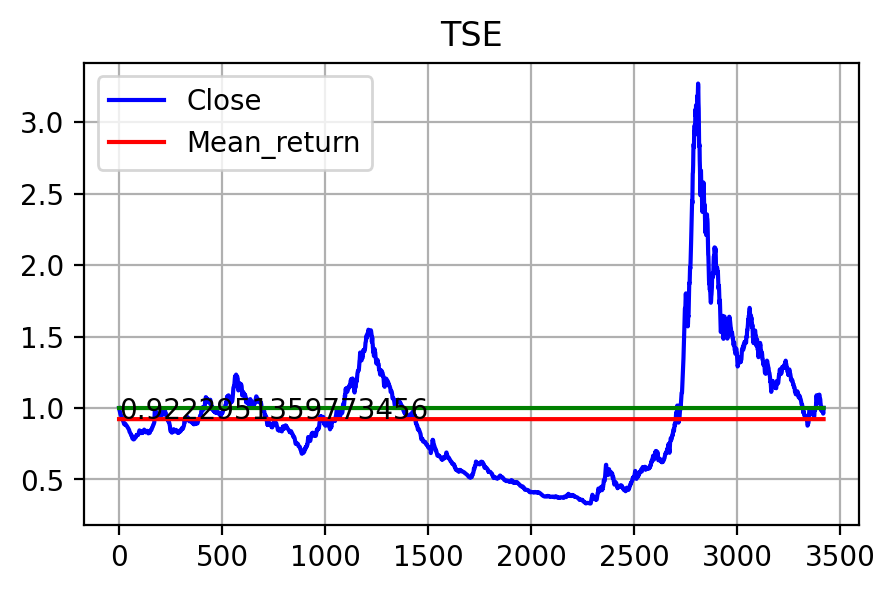

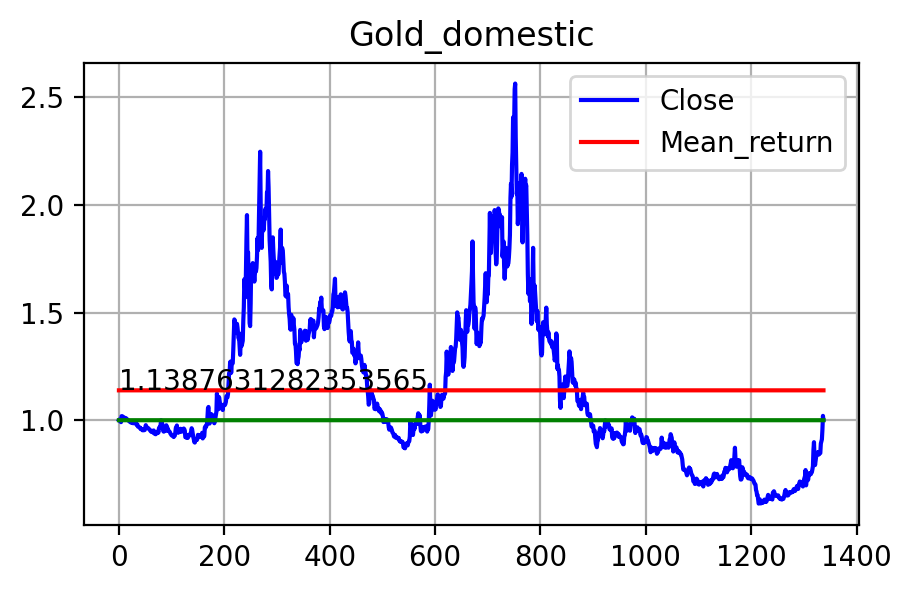

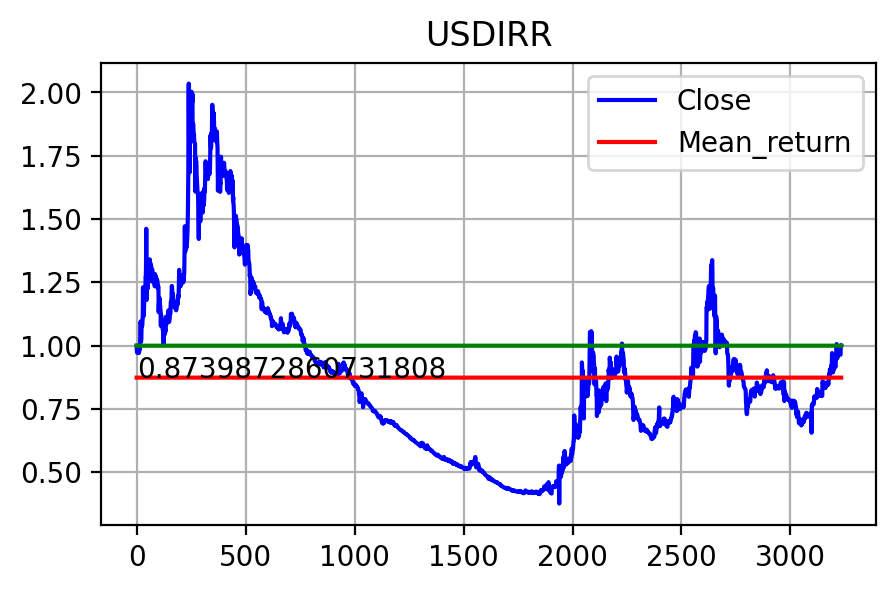

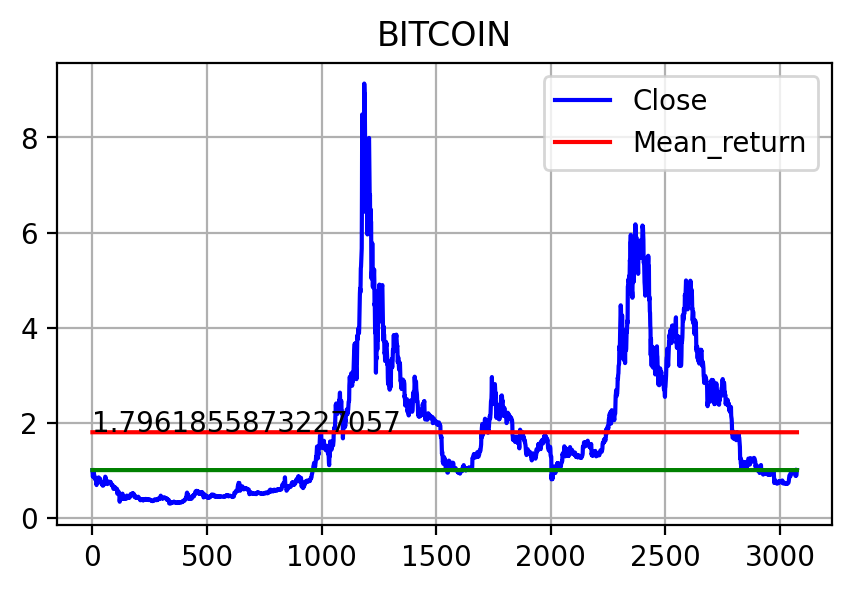

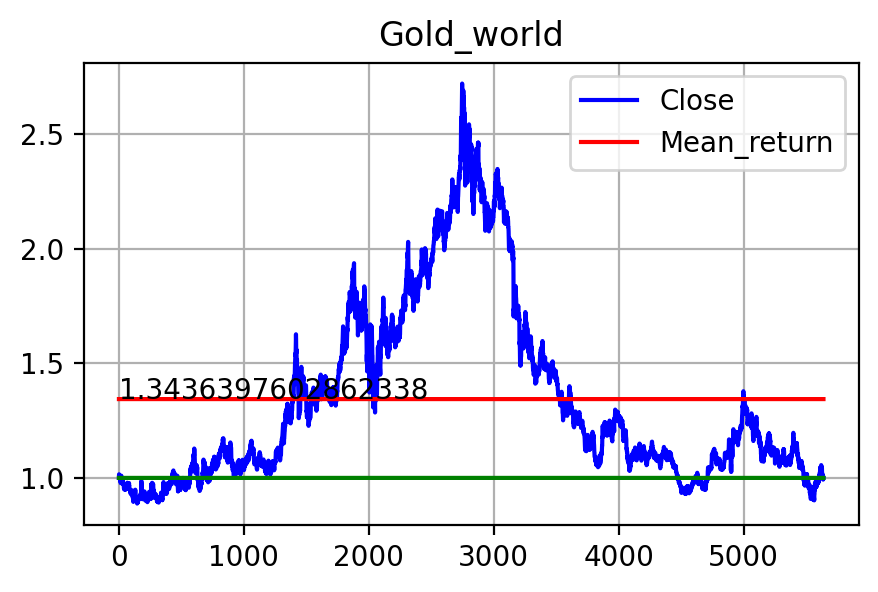

In [272]:
for l,k in enumerate(index):
    #preprocess
    for i in k.columns:
        for j in k.index:
            if type(k[i][j])== type(''):
                k[i][j]=float(k[i][j])
    # drop volume from dataframe k
    if 'Volume' in k.columns:
        vol=k['Volume']
        k.drop('Volume',axis=1,inplace=True)
    #remove 0 form dataframe k
    for i in k.columns:
        k.drop(k[i][k[i]==0].index,axis=0,inplace=True)

    # drop volume from dataframe k
    #vol=k['Volume']
    #k=k.drop('Volume',axis=1)

    # define columns of return dataframe of k
    mapper={i:f'{i}_return_1d' for i in k.columns}

    #print(mapper)
    #build return dataframe of k
    data_exp={f'{mapper[i]}':[1] for i in mapper.keys()}
    for i in k.columns:
        for j in range(1,len(k.index)):
            data_exp[mapper[i]].append(k[i][j]/k[i][j-1])

    #calculuse of mean exponential of feature dataframe
    mean_col = {}
    #print(mean_col)
    #print(k.columns)
    for i in k.columns:
        mean_col[f'{i}'] = mean_exp(data_exp[f'{i}_return_1d'])

    #build expcted values from mean exponential return
    expected_data = {}
    for i in k.columns:
        expected_data[f'exp_{i}'] = []
        for j in range(len(k.index)):
            expected_data[f'exp_{i}'].append(k[i][0] * mean_col[i] ** j)
    #print(len(k.index))
    #print(len(vol))
    #pd.DataFrame(expected_data)
    expected_data = pd.DataFrame(expected_data)
    if 'Volume' in k.columns:
        expected_data['Volume']=vol.values
    expected_data.index=k.index
    final_data=pd.DataFrame(k.values/expected_data.values,columns=k.columns,index=k.index)
    plt.figure(figsize=(5,3),dpi=200)
    plt.plot(range(len(final_data.index)),final_data['Close'],c='blue')
    plt.plot([final_data['Close'].mean()]*len(final_data.index),c='red')
    plt.plot([1]*len(final_data.index),c='green')
    plt.legend(['Close','Mean_return'])
    plt.text(0,final_data['Close'].mean(),f"{final_data['Close'].mean()}",c='black')
    plt.title(name_dict[l])
    #plt.xlable(f'last={for_export_data['<CLOSE>'][-1]}')
    plt.grid()
    plt.show()
    file=open('C:\\Users\ADMIN\Desktop\\tse2\\'+'Expected-'+name_dict[l]+'.prn','w')
    file.write('<DTYYYYMMDD>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>')
    file.write('\n')
    for i in final_data.index:
        for j in final_data.columns:
            if j != final_data.columns[-1]:
                file.write(str(final_data[j][i]))
                file.write(',')
            else:
                file.write(str(final_data[j][i]))
        file.write('\n')
    file.close()
    time.sleep(10)




100%|██████████| 10/10 [00:10<00:00,  1.01s/it]




  0%|          | 0/3 [00:00<?, ?it/s]